<a href="https://colab.research.google.com/github/ask-kawade/Mobile-Price-Range-Prediction--Classification-Problem/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

#set style
plt.style.use('seaborn')


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

In [2]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# CSV file loaction path
file_path= '/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECTS/Mobile Price Range Prediction/data_mobile_price_range.csv'

In [4]:
# importing csv file into Pandas dataframe.
mobile_data=pd.read_csv(file_path)

In [5]:
# first 5 rows
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
# Last 5 Rows of the data

mobile_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [7]:
# lets Check the shape of data
print(mobile_data.shape)
print(f'Total Rows = {mobile_data.shape[0]}\nTotol Columns={mobile_data.shape[1]} ')

(2000, 21)
Total Rows = 2000
Totol Columns=21 


In [8]:
# Checking Statistic of the data
mobile_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Some Basic Observations:
* We can see that sc_width and px_height has minimum value 0. which is not possible in any mobile. We need to handle this mismatch.

In [9]:
# Checking How many observations having px_hieght value as 0.
print(mobile_data[mobile_data['px_height']==0].shape[0])

2


In [10]:
# As there are only 2 observations having px_height=0. so we will drop it.
mobile_data=mobile_data[mobile_data['px_height']!=0]

## Nearest Neighbors Imputations (KNNImputer)

Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

Let’s take the above example of the titanic dataset to see how it works.
* Before using KNN Imputer we need to replace 0 with NAN values. so that it will work.

In [11]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
mobile_data['sc_w']=mobile_data['sc_w'].replace(0,np.nan)

In [12]:
# import KNN imputer frio sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
mobile_data=pd.DataFrame(impute_knn.fit_transform(mobile_data),columns=mobile_data.columns)

In [13]:
# Checking shape
mobile_data.shape

(1998, 21)

In [14]:
# Checking How many observations having sc_w value as 0.
mobile_data[mobile_data['sc_w']==0].shape[0]

0

Thus we have handled the mismatched values of the data.

In [15]:
# Checking the datatypes, non null values
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

* We don't have any object data type in our data set.
* Also we have Zero null values in data set.
* Price_range is our target variable.

In [16]:
# Checking Null values.
mobile_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

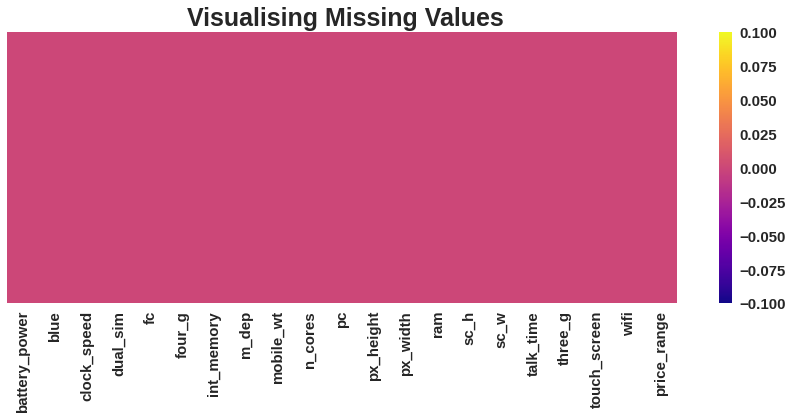

In [17]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(mobile_data.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

No Null values found. Which is good thing for us.

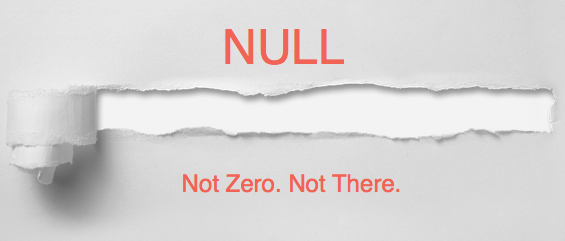

In [18]:
# Checking Duplicate values in data set.
print(f' We have {mobile_data.duplicated().sum()} duplicate values in dataset.')

 We have 0 duplicate values in dataset.


#EDA

##Let's have look ar our target variable first.!

In [19]:
# lets have look at our target variable's counts
price_range_values=mobile_data['price_range'].value_counts()
price_range_values

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

Wow.!  we have equal number of obseravtions for each category. Thus we don't have imbalanced target variable. 

This is the target variable with value of
* 0=low cost,
* 1=medium cost,
* 2=high cost,
* 3=very high cost.

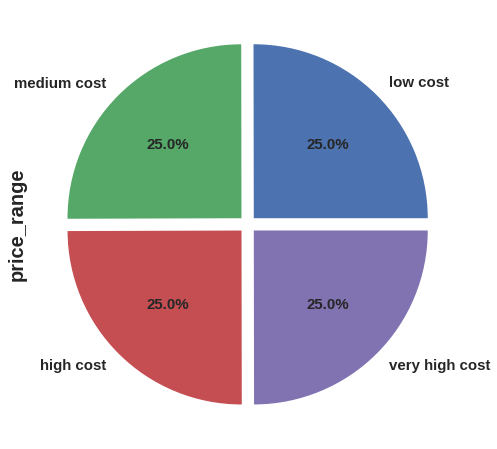

In [20]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)    # plotting pie chart


* We can see that our target varibale is equally distributed. 
* Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us.

## Correlation of target varaible i.e Dependent variable with the other independent variable.

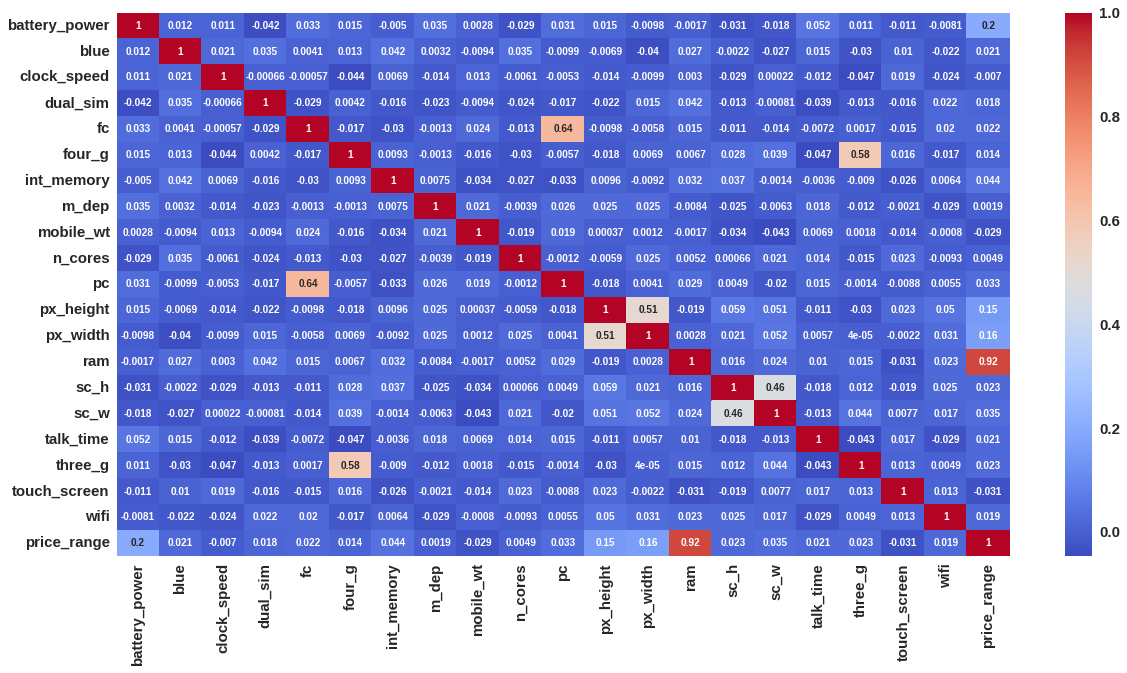

In [21]:
corr= mobile_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap='coolwarm')

Observations:
* RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.
* Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.
* Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.

* Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.

* primary camera i.e pc and front camera fc are positively correlated.

In [22]:
mobile_data.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#Univariate Analysis of Categorical columns.

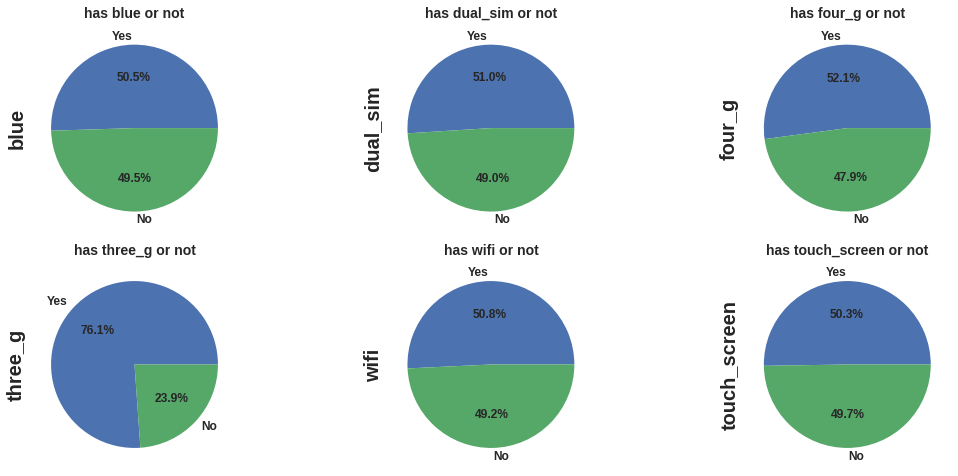

In [23]:
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  mobile_data[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1
  

* 1 means it has the specifications.
* 0 means it do not have the specifications.
* Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreem are almost 50 %.
* very few mobiles(23.8%) do not have Three_g.


## Relation Between RAM,Battery_power,px_height and px_width

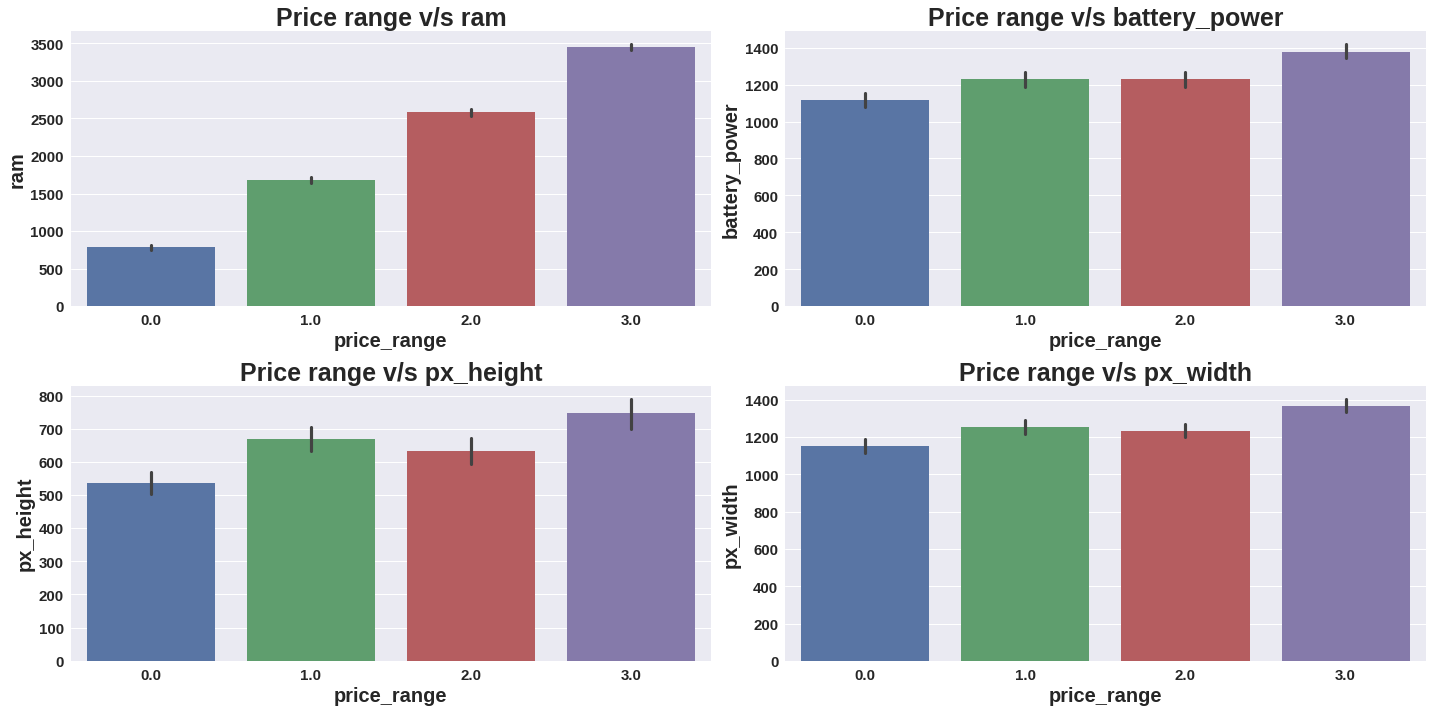

In [24]:
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=mobile_data['price_range'],y=mobile_data[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()




### Observations:
* Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.
* Mobiles having RAM less than 1000 MB falls under low cost category.
* Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.
* Mobiles with more than 700 pixel height and width more than 1300 has very high cost. 

# Let's Check the distribution of numerical columns.

In [25]:
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [26]:
numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

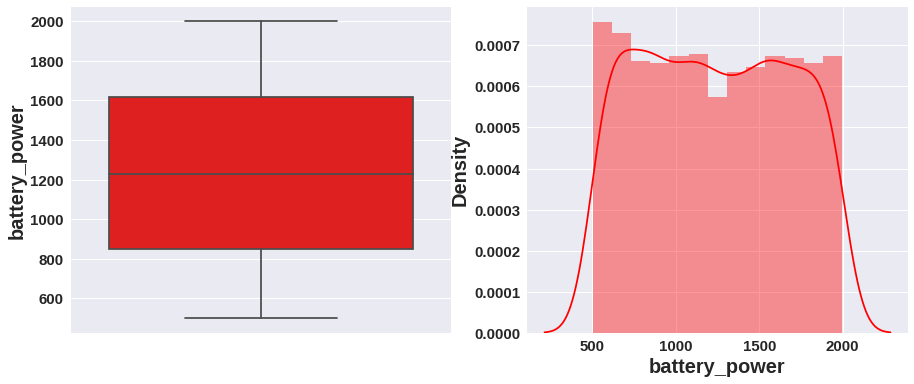

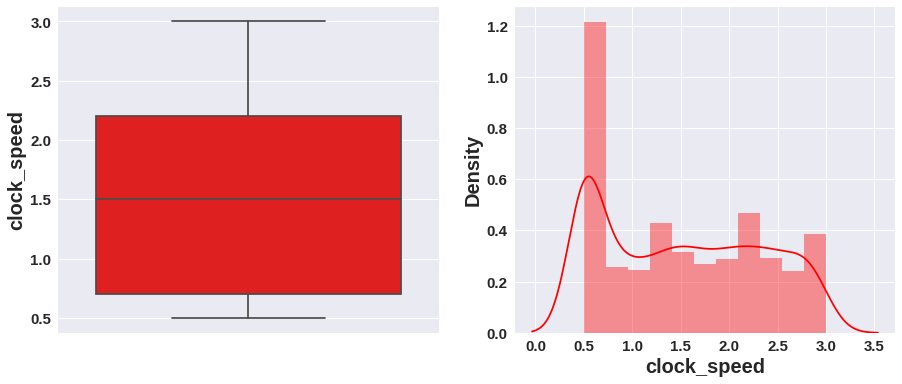

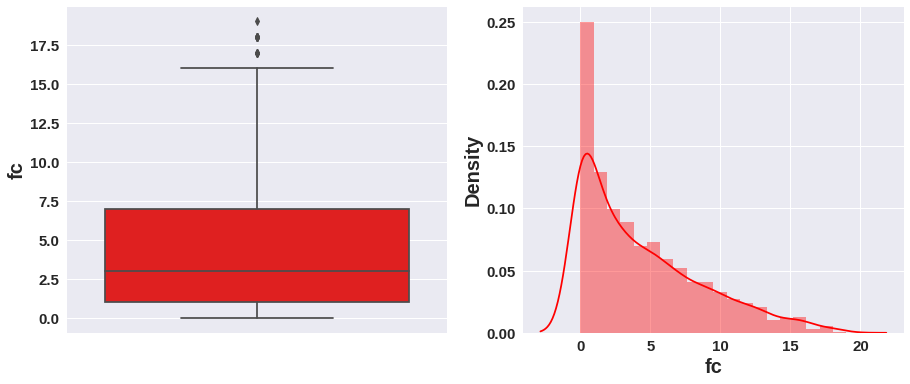

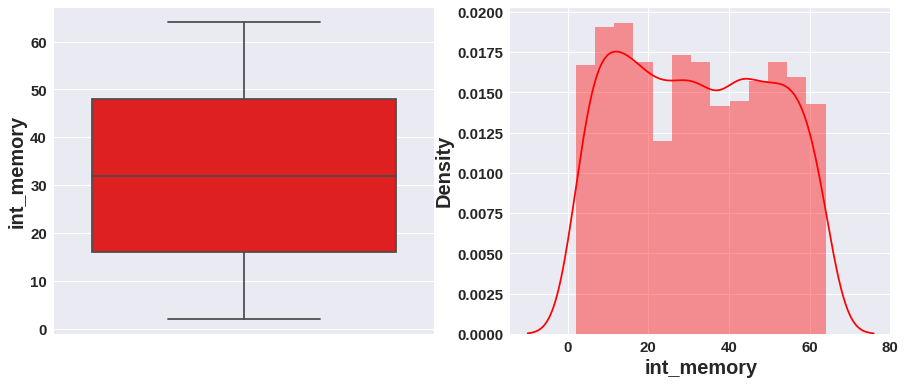

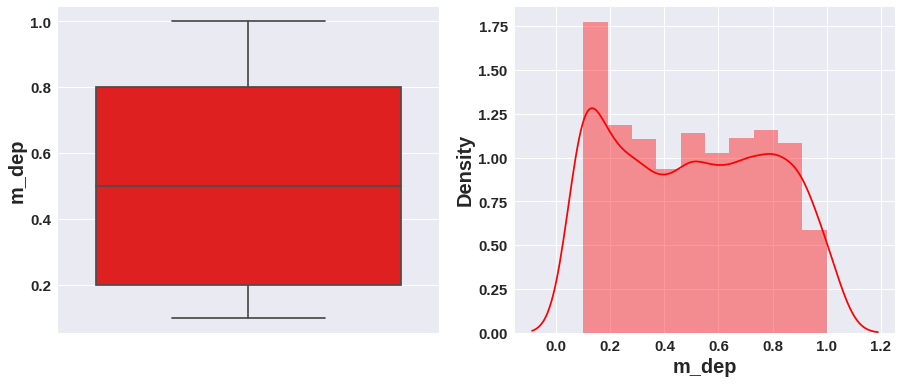

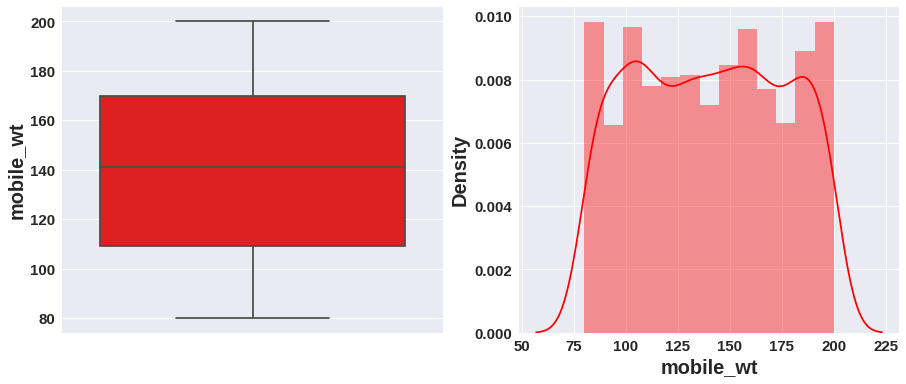

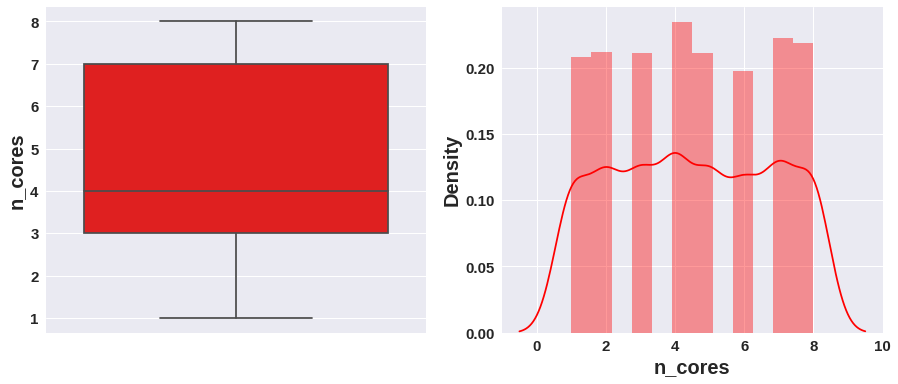

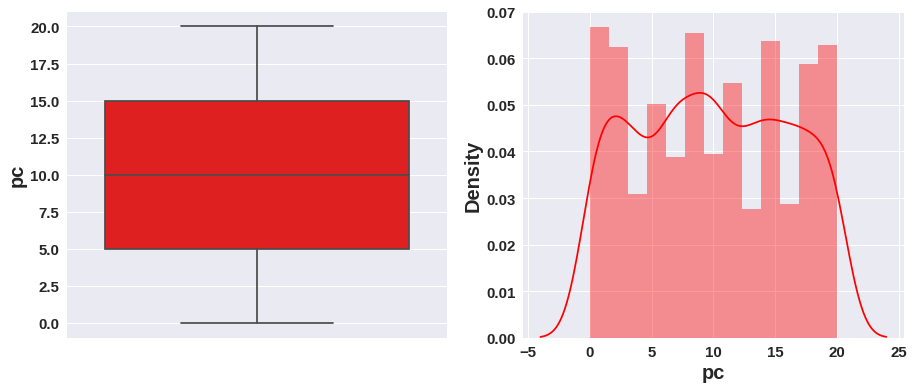

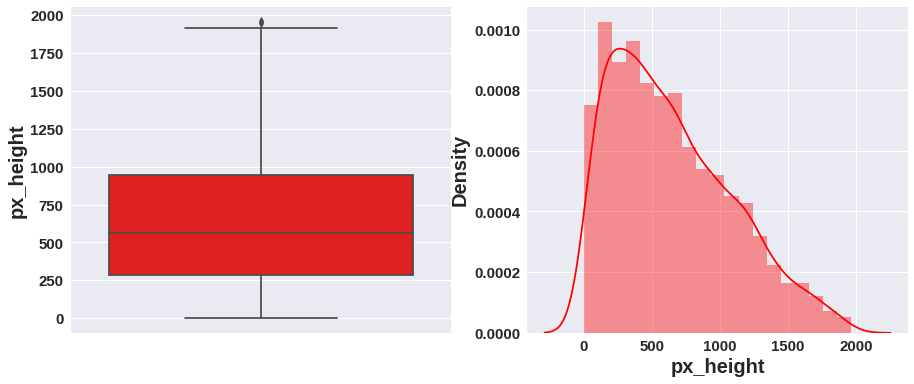

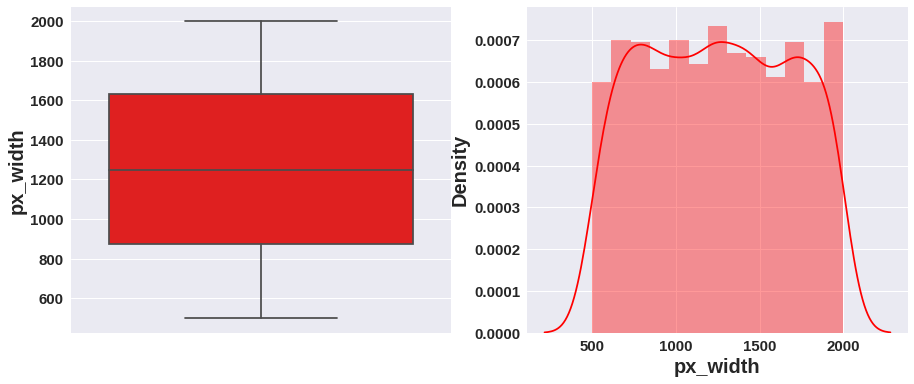

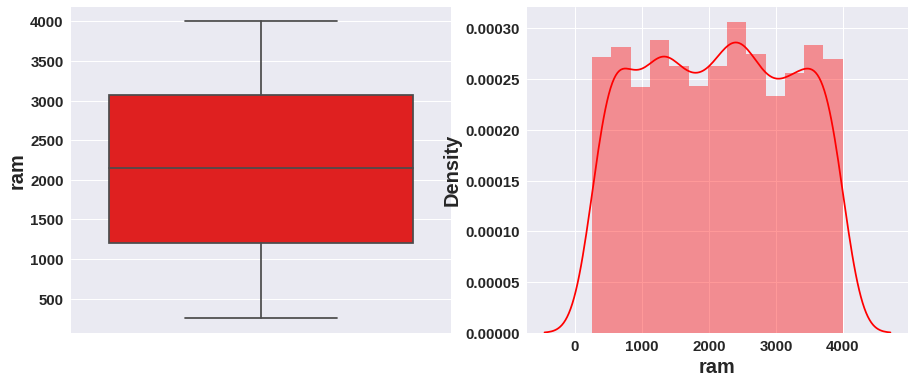

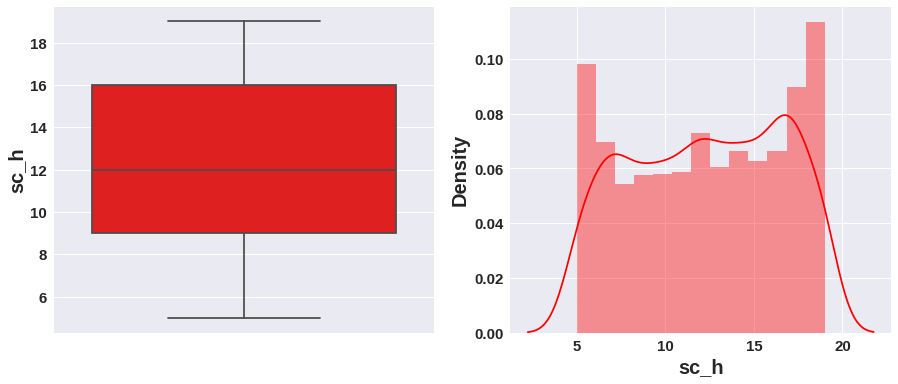

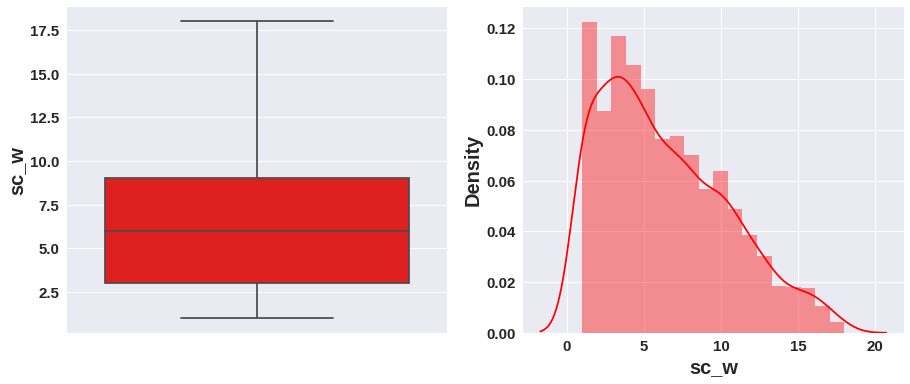

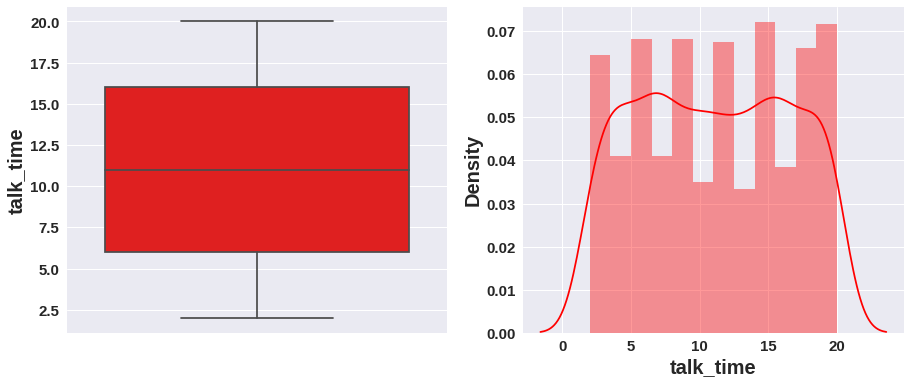

In [27]:
for var in numeric_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=mobile_data[var],color='red')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(mobile_data[var],color='red')
    
    fig.set_xlabel(var)

    plt.show()

* Data is well distrubted.
* fc and px_height has some outliers.

In [28]:
Q1 = mobile_data["fc"].quantile(0.25)
Q3 = mobile_data['fc'].quantile(0.991)
IQR = Q3-Q1

mobile_data = mobile_data[(mobile_data['fc'] <= Q3)]

In [29]:
Q1 = mobile_data["px_height"].quantile(0.25)
Q3 = mobile_data['px_height'].quantile(0.991)
IQR = Q3-Q1

mobile_data = mobile_data[(mobile_data['px_height'] <= Q3)]

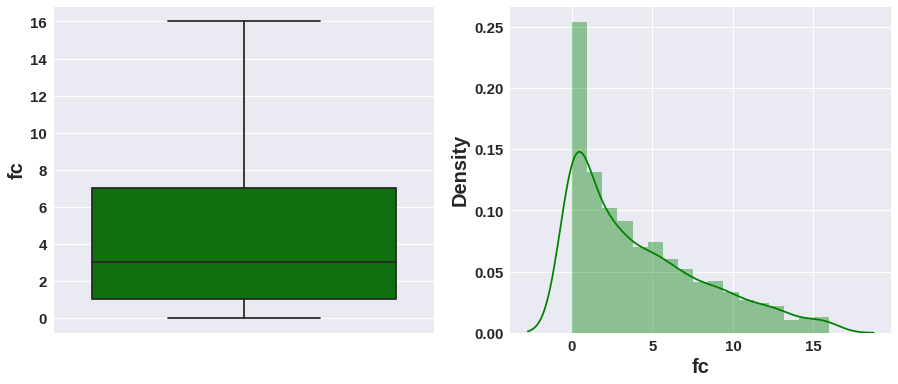

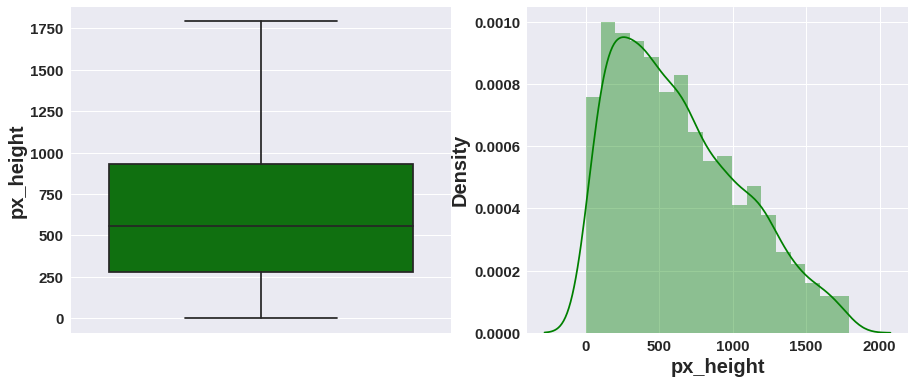

In [31]:
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=mobile_data[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(mobile_data[var],color='green')
    
    fig.set_xlabel(var)

    plt.show()

# Mobiles with both 3G and 4G.

In [32]:
# Mobiles have both 3G and 4G specifications.
three_g_and_4g_df=mobile_data[(mobile_data['three_g']==1) & (mobile_data['four_g']==1)]

In [33]:
three_g_and_4g_df['price_range'].value_counts()

3.0    265
1.0    256
0.0    254
2.0    242
Name: price_range, dtype: int64

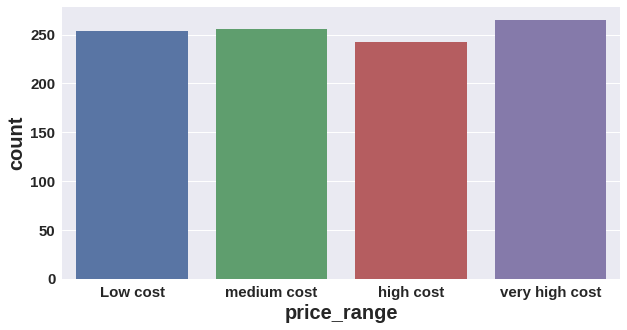

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(three_g_and_4g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.show()

* As we can see from low cost to very high cost mobiles have both features.

#mobiles with 3G

In [35]:
three_g_df=mobile_data[(mobile_data['three_g']==1) & (mobile_data['four_g']!=1)]

In [36]:
three_g_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
5,1859.0,0.0,0.5,1.0,3.0,0.0,22.0,0.7,164.0,1.0,7.0,1004.0,1654.0,1067.0,17.0,1.0,10.0,1.0,0.0,0.0,1.0
7,1954.0,0.0,0.5,1.0,0.0,0.0,24.0,0.8,187.0,4.0,0.0,512.0,1149.0,700.0,16.0,3.0,5.0,1.0,1.0,1.0,0.0
8,1445.0,1.0,0.5,0.0,0.0,0.0,53.0,0.7,174.0,7.0,14.0,386.0,836.0,1099.0,17.0,1.0,20.0,1.0,0.0,0.0,0.0
12,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,1482.0,18.0,3.0,2.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,1829.0,1.0,2.1,0.0,8.0,0.0,59.0,0.1,91.0,5.0,15.0,1457.0,1919.0,3142.0,16.0,6.0,5.0,1.0,1.0,1.0,3.0
1990,674.0,1.0,2.9,1.0,1.0,0.0,21.0,0.2,198.0,3.0,4.0,576.0,1809.0,1180.0,6.0,3.0,4.0,1.0,1.0,1.0,0.0
1991,1467.0,1.0,0.5,0.0,0.0,0.0,18.0,0.6,122.0,5.0,0.0,888.0,1099.0,3962.0,15.0,11.0,5.0,1.0,1.0,1.0,3.0
1992,858.0,0.0,2.2,0.0,1.0,0.0,50.0,0.1,84.0,1.0,2.0,528.0,1416.0,3978.0,17.0,16.0,3.0,1.0,1.0,0.0,3.0


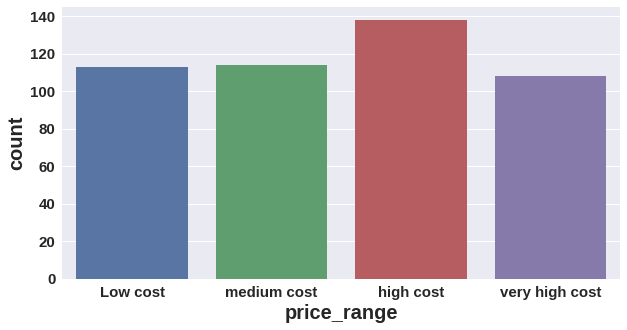

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(three_g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.show()

#Mobiles not having no 3G and 4G. 

In [38]:
No_3g_4G_df=mobile_data[(mobile_data['three_g']!=1) & (mobile_data['four_g']!=1)]

In [39]:
No_3g_4G_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
10,769.0,1.0,2.9,1.0,0.0,0.0,9.0,0.1,182.0,5.0,1.0,248.0,874.0,3946.0,5.0,2.0,7.0,0.0,0.0,0.0,3.0
19,682.0,1.0,0.5,0.0,4.0,0.0,19.0,1.0,121.0,4.0,11.0,902.0,1064.0,2337.0,11.0,1.0,18.0,0.0,1.0,1.0,1.0
22,1949.0,0.0,2.6,1.0,4.0,0.0,47.0,0.3,199.0,4.0,7.0,407.0,822.0,1433.0,11.0,5.0,20.0,0.0,0.0,1.0,1.0
30,1579.0,1.0,0.5,1.0,0.0,0.0,5.0,0.2,88.0,7.0,9.0,1358.0,1739.0,3532.0,17.0,11.0,12.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,1454.0,0.0,2.6,0.0,8.0,0.0,6.0,0.4,199.0,3.0,20.0,698.0,1018.0,1300.0,10.0,9.0,2.0,0.0,0.0,1.0,1.0
1980,1784.0,0.0,1.6,0.0,4.0,0.0,41.0,0.4,164.0,6.0,20.0,610.0,1437.0,2313.0,14.0,1.0,11.0,0.0,1.0,0.0,2.0
1981,1262.0,0.0,1.8,1.0,12.0,0.0,34.0,0.1,149.0,5.0,16.0,223.0,737.0,3248.0,13.0,3.0,4.0,0.0,1.0,1.0,2.0
1986,1547.0,1.0,2.9,0.0,2.0,0.0,57.0,0.4,114.0,1.0,3.0,347.0,957.0,1620.0,9.0,2.0,19.0,0.0,1.0,1.0,1.0


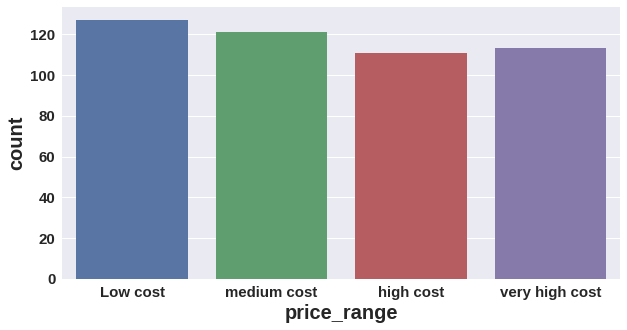

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(No_3g_4G_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.show()